# Google app store EDA

In [6]:
# import liberaries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# import data
df = pd.read_csv('./data/old_googleplaystore.csv')

In [8]:
# run automatic eda using ydata profiling liberary
# comment out these code if you want auto EDA
# import ydata_profiling as yd
# profile = yd.ProfileReport(df)
# profile.to_file(output_file='./output/05_ydata_googleplaystore.html')

In [9]:
# check the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [10]:
# let have a look on the data
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
# take sample from big-dataset
df.sample(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8096,Cy Messenger,COMMUNICATION,4.5,4,8.1M,100+,Free,0,Everyone,Communication,"August 30, 2014",1.3.0,2.3.3 and up
9747,Shoulder Surgery ER Emergency Doctor Game,FAMILY,3.9,55,46M,"10,000+",Free,0,Teen,Educational,"November 7, 2017",1.0.1,4.0 and up


In [12]:
df.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


In [13]:
# percentage of missing value
df.isnull().sum() / len(df) * 100

App                0.000000
Category           0.009224
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.000000
Genres             0.009224
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.018448
dtype: float64

<Axes: >

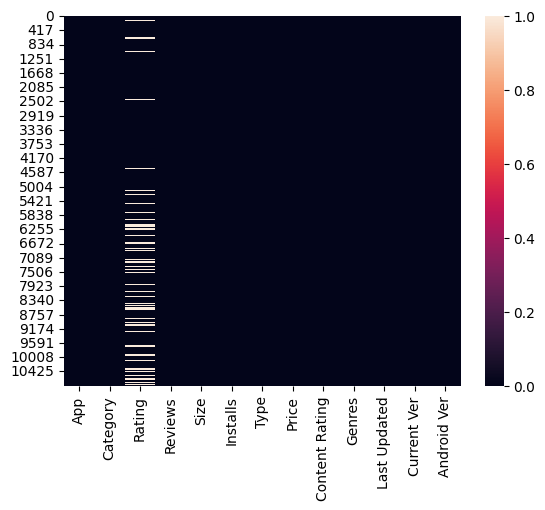

In [14]:
# heat map of null value
sns.heatmap(df.isnull())

# Assignment write down all the numeric variables and make them numeric
1. size
2. install
3. price

# check that how many MB's are there in one KB? and how to calculate them?
1. convert KBs into M
2. Then remove M from all numbers
3. Handle varies with device

In [15]:
df['Size'].isnull().sum()

np.int64(0)

In [16]:
df['Size'].value_counts()

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: count, Length: 461, dtype: int64

In [17]:
df['Size'] = df['Size'].str.replace('k', '')

In [18]:
numeric_vals = []
for val in df['Size']:
    try:
        numeric_vals.append(float(val)/1000)
    except ValueError:
        numeric_vals.append(val)
        
df['Size'] = numeric_vals  

In [19]:
df['Size'] = df['Size'].str.replace('M', '')

In [20]:
df['Size'].value_counts()

Size
Varies with device    1695
11                     198
12                     196
14                     194
13                     191
                      ... 
84                       9
89                       9
86                       8
1.0                      7
90                       6
Name: count, Length: 183, dtype: int64

In [21]:
df['Size'] = df['Size'].str.replace('Varies with device', '')

In [22]:
df['Size'].value_counts()

Size
       1695
11      198
12      196
14      194
13      191
       ... 
84        9
89        9
86        8
1.0       7
90        6
Name: count, Length: 183, dtype: int64

In [23]:
df['Size'].isnull().sum()

np.int64(316)

In [24]:
pd.to_numeric(df['Size'], errors='coerce')

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10841, dtype: float64

In [25]:
# Convert numeric values to float and skip nulls  
df['Size'] = pd.to_numeric(df['Size'], errors='coerce') 

# Fill nulls with original value 
df['Size'] = df['Size'].fillna(df['Size'])

In [26]:
df['Size'].min()

np.float64(1.0)

In [27]:
df['Size'].max()

np.float64(100.0)

<Axes: xlabel='Size', ylabel='Count'>

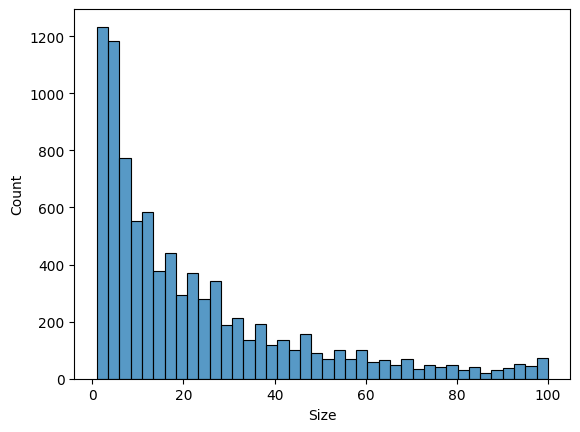

In [28]:
sns.histplot(df['Size'])

# Feature Engineering

In [29]:
bins = [0,1,5,10,15,20,50,75,100]
labels = ['v_small','small_medium','small','light_medium', 'medium', 'medium_high', 'medium_large', 'large']

#kis colum ko bins men convert krna hai
df['binned_size'] = pd.cut(df['Size'],bins = bins, labels=labels)

In [30]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,binned_size
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,medium
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,light_medium
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,small
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,medium_high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,small_medium


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   App             10841 non-null  object  
 1   Category        10840 non-null  object  
 2   Rating          9367 non-null   float64 
 3   Reviews         10841 non-null  int64   
 4   Size            8830 non-null   float64 
 5   Installs        10841 non-null  object  
 6   Type            10840 non-null  object  
 7   Price           10841 non-null  object  
 8   Content Rating  10841 non-null  object  
 9   Genres          10840 non-null  object  
 10  Last Updated    10841 non-null  object  
 11  Current Ver     10833 non-null  object  
 12  Android Ver     10839 non-null  object  
 13  binned_size     8830 non-null   category
dtypes: category(1), float64(2), int64(1), object(10)
memory usage: 1.1+ MB


# Install Column

In [32]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [33]:
import string

special_characters = string.punctuation

df['Installs'] = df['Installs'].str.translate(str.maketrans('', '', special_characters))

In [34]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

In [35]:
df['Installs'].isnull().sum()

np.int64(0)

In [36]:
# Convert numeric values to float and skip nulls  
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce') 

# Fill nulls with original value 
df['Installs'] = df['Installs'].fillna(df['Installs'])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   App             10841 non-null  object  
 1   Category        10840 non-null  object  
 2   Rating          9367 non-null   float64 
 3   Reviews         10841 non-null  int64   
 4   Size            8830 non-null   float64 
 5   Installs        10841 non-null  int64   
 6   Type            10840 non-null  object  
 7   Price           10841 non-null  object  
 8   Content Rating  10841 non-null  object  
 9   Genres          10840 non-null  object  
 10  Last Updated    10841 non-null  object  
 11  Current Ver     10833 non-null  object  
 12  Android Ver     10839 non-null  object  
 13  binned_size     8830 non-null   category
dtypes: category(1), float64(2), int64(2), object(9)
memory usage: 1.1+ MB


# How to handle price

In [38]:
df['Price'].value_counts()

Price
0         10041
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$19.90        1
$1.75         1
$14.00        1
$4.85         1
$1.04         1
Name: count, Length: 92, dtype: int64

In [39]:
df['Price'].isnull().sum()

np.int64(0)

# Remove $ sign from all columns using pandas?type casting

In [40]:
df['Price'].isnull().sum()

np.int64(0)

In [41]:
df['Price'].value_counts()

Price
0         10041
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$19.90        1
$1.75         1
$14.00        1
$4.85         1
$1.04         1
Name: count, Length: 92, dtype: int64

In [42]:
df['Price'] = pd.to_numeric(df['Price'].str.replace('$', ''), errors='coerce').astype(float)

In [43]:
df['Price'].max()

np.float64(400.0)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   App             10841 non-null  object  
 1   Category        10840 non-null  object  
 2   Rating          9367 non-null   float64 
 3   Reviews         10841 non-null  int64   
 4   Size            8830 non-null   float64 
 5   Installs        10841 non-null  int64   
 6   Type            10840 non-null  object  
 7   Price           10841 non-null  float64 
 8   Content Rating  10841 non-null  object  
 9   Genres          10840 non-null  object  
 10  Last Updated    10841 non-null  object  
 11  Current Ver     10833 non-null  object  
 12  Android Ver     10839 non-null  object  
 13  binned_size     8830 non-null   category
dtypes: category(1), float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [45]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9367.000000,1.084100e+04,8830.000000,1.084100e+04,10841.000000
mean,4.191513,4.441119e+05,22.268358,1.546291e+07,1.027273
std,0.515735,2.927629e+06,22.628339,8.502557e+07,15.948971
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,5.400000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,14.000000,1.000000e+05,0.000000
75%,4.500000,5.476800e+04,31.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [46]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,binned_size
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,medium
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,light_medium
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,small
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,medium_high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,small_medium


<Axes: >

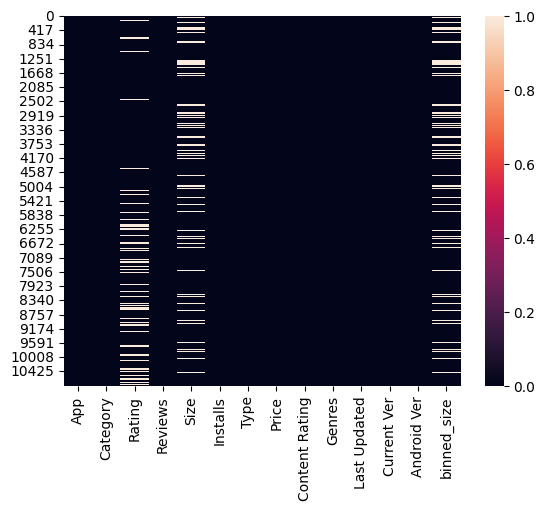

In [47]:
# heat map of null value
sns.heatmap(df.isnull())